In [1]:
!pip install segmentation_models_pytorch warmup_scheduler albumentations -q


In [2]:
import os
import sys
import random
from glob import glob
import warnings

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

sys.path.append('/kaggle/working/notebook/experiment/2d')
from script.helper import *
from script.dataset import *
from script.metrics import *
from script.trainer import *
from script.model import *
from script.loss import *
from script.scheduler import *


## config

In [7]:
class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'
    comp_dir_path = '/kaggle/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'

    dataset_path = "/kaggle/working/dataset_train/"
    train_dataset_path = "/kaggle/working/dataset_train/flatten/1-9/"

    exp_name = os.getcwd().split('/')[-1]

    # ============== model cfg =============
    model_name = 'Unet'
    backbone = 'efficientnet-b0'
    in_chans = 9

    # ============== pred target =============
    target_size = 1

    # ============== training cfg =============
    size = 224
    tile_size = 224
    stride = tile_size // 2

    train_batch_size = 16  # 32
    valid_batch_size = train_batch_size * 2
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'

    epochs = 20  # 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    metric_direction = 'maximize'  # maximize, 'minimize'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 4

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),
                        mask_fill_value=0, p=0.5),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]


warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True  # type: ignore

set_seed(CFG.seed)
os.makedirs(f'./{CFG.exp_name}/', exist_ok=True)


## Dataset

In [8]:
def preprocess(image, fragment_i, split_i):
    # image=np.clip(image, a_min=0.15,a_max=0.7)
    return image



len(train_images) = 14624
train_images[0].shape = (224, 224, 9)
train_labels[0].shape = (224, 224, 1)
train_masks[0].shape = (224, 224, 1)

len(valid_images) = 4161
valid_images[0].shape = (224, 224, 9)
valid_labels[0].shape = (224, 224, 1)



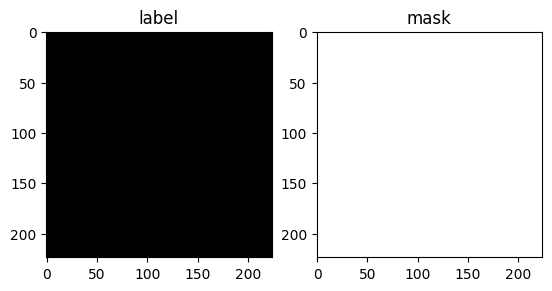

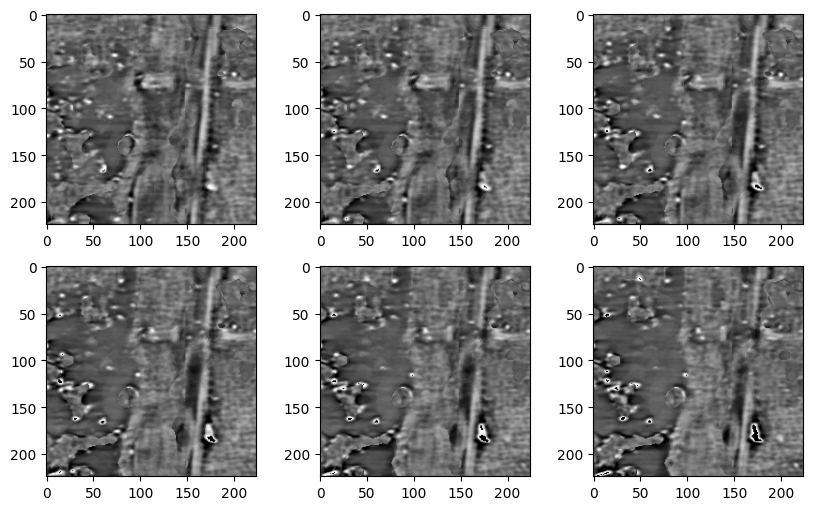

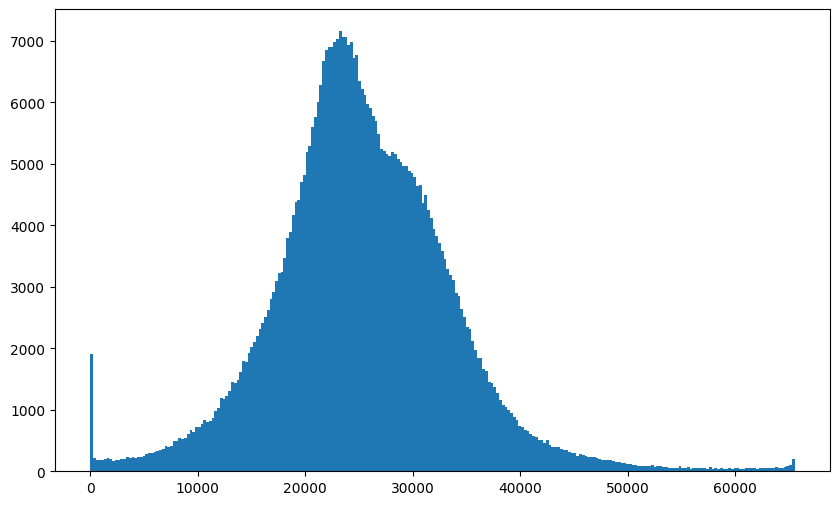

In [9]:
# confirmation

valid_fragment_i = 1
valid_split_i = 0

train_images, train_labels, train_masks, valid_images, valid_labels, valid_xyxys = get_train_valid_dataset(valid_fragment_i, valid_split_i, CFG, preprocess)

print(f"""
{len(train_images) = }
{train_images[0].shape = }
{train_labels[0].shape = }
{train_masks[0].shape = }

{len(valid_images) = }
{valid_images[0].shape = }
{valid_labels[0].shape = }
""")

id = random.randint(0, len(train_labels))
visualize_train_images(id, train_images, train_labels, train_masks)


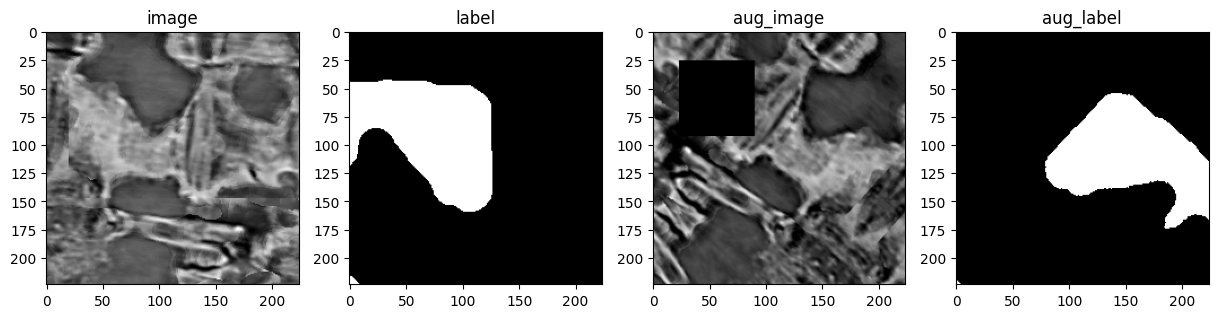

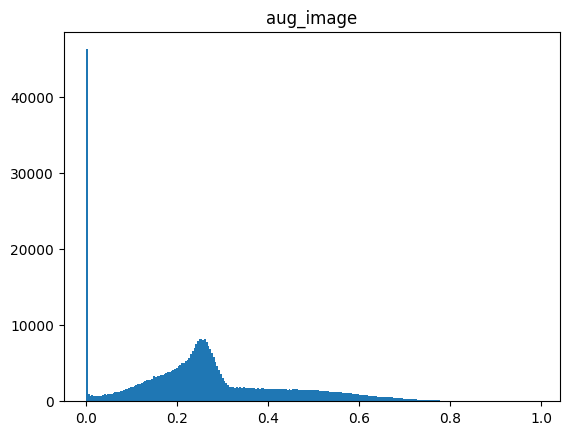

In [10]:
# confirmation
plot_dataset = CustomDataset(train_images, CFG, labels=train_labels)
visualize_dataset(plot_dataset, CFG)


## main

In [11]:
train_and_evaluate(preprocess, CFG)
!curl -X POST -H 'Authorization: Bearer '$LINE -F 'message=セルの実行が終わりました！' https://notify-api.line.me/api/notify

fold: 0


100%|██████████| 131/131 [00:04<00:00, 29.65it/s]


fbeta: 0.1086
Epoch 1 - avg_train_loss: 0.6065  avg_val_loss: 0.4171  avgScore: 0.1086  time: 51s
Epoch 1 - Save Best Loss: 0.4171  Best Score: 0.1086 Model



100%|██████████| 131/131 [00:04<00:00, 31.02it/s]


fbeta: 0.0061
Epoch 2 - avg_train_loss: 0.3870  avg_val_loss: 0.3307  avgScore: 0.0061  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.52it/s]


fbeta: 0.0006
Epoch 3 - avg_train_loss: 0.2826  avg_val_loss: 0.2483  avgScore: 0.0006  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.34it/s]


fbeta: 0.2923
Epoch 4 - avg_train_loss: 0.2546  avg_val_loss: 0.2443  avgScore: 0.2923  time: 48s
Epoch 4 - Save Best Loss: 0.2443  Best Score: 0.2923 Model



100%|██████████| 131/131 [00:04<00:00, 31.24it/s]


fbeta: 0.2911
Epoch 5 - avg_train_loss: 0.2457  avg_val_loss: 0.2628  avgScore: 0.2911  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.13it/s]


fbeta: 0.4105
Epoch 6 - avg_train_loss: 0.2401  avg_val_loss: 0.2466  avgScore: 0.4105  time: 48s
Epoch 6 - Save Best Loss: 0.2466  Best Score: 0.4105 Model



100%|██████████| 131/131 [00:04<00:00, 30.99it/s]


fbeta: 0.3968
Epoch 7 - avg_train_loss: 0.2326  avg_val_loss: 0.2470  avgScore: 0.3968  time: 49s



100%|██████████| 131/131 [00:04<00:00, 31.40it/s]


fbeta: 0.4222
Epoch 8 - avg_train_loss: 0.2259  avg_val_loss: 0.2521  avgScore: 0.4222  time: 48s
Epoch 8 - Save Best Loss: 0.2521  Best Score: 0.4222 Model



100%|██████████| 131/131 [00:04<00:00, 31.21it/s]


fbeta: 0.3950
Epoch 9 - avg_train_loss: 0.2214  avg_val_loss: 0.2461  avgScore: 0.3950  time: 49s



100%|██████████| 131/131 [00:04<00:00, 30.31it/s]


fbeta: 0.4143
Epoch 10 - avg_train_loss: 0.2211  avg_val_loss: 0.2602  avgScore: 0.4143  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.40it/s]


fbeta: 0.3352
Epoch 11 - avg_train_loss: 0.2109  avg_val_loss: 0.2663  avgScore: 0.3352  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.27it/s]


fbeta: 0.3737
Epoch 12 - avg_train_loss: 0.2083  avg_val_loss: 0.2631  avgScore: 0.3737  time: 49s



100%|██████████| 131/131 [00:04<00:00, 31.13it/s]


fbeta: 0.4257
Epoch 13 - avg_train_loss: 0.2069  avg_val_loss: 0.2607  avgScore: 0.4257  time: 48s
Epoch 13 - Save Best Loss: 0.2607  Best Score: 0.4257 Model



100%|██████████| 131/131 [00:04<00:00, 30.60it/s]


fbeta: 0.3898
Epoch 14 - avg_train_loss: 0.2026  avg_val_loss: 0.2718  avgScore: 0.3898  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.36it/s]


fbeta: 0.4058
Epoch 15 - avg_train_loss: 0.1949  avg_val_loss: 0.2784  avgScore: 0.4058  time: 48s



100%|██████████| 131/131 [00:04<00:00, 31.76it/s]


fbeta: 0.4215
Epoch 16 - avg_train_loss: 0.1933  avg_val_loss: 0.2765  avgScore: 0.4215  time: 47s



100%|██████████| 131/131 [00:04<00:00, 31.74it/s]


fbeta: 0.4261
Epoch 17 - avg_train_loss: 0.1905  avg_val_loss: 0.2640  avgScore: 0.4261  time: 47s
Epoch 17 - Save Best Loss: 0.2640  Best Score: 0.4261 Model



100%|██████████| 131/131 [00:04<00:00, 31.55it/s]


fbeta: 0.4274
Epoch 18 - avg_train_loss: 0.1880  avg_val_loss: 0.2722  avgScore: 0.4274  time: 48s
Epoch 18 - Save Best Loss: 0.2722  Best Score: 0.4274 Model



100%|██████████| 131/131 [00:04<00:00, 31.41it/s]


fbeta: 0.4298
Epoch 19 - avg_train_loss: 0.1883  avg_val_loss: 0.2741  avgScore: 0.4298  time: 48s
Epoch 19 - Save Best Loss: 0.2741  Best Score: 0.4298 Model



100%|██████████| 131/131 [00:04<00:00, 31.94it/s]


fbeta: 0.4236
Epoch 20 - avg_train_loss: 0.1839  avg_val_loss: 0.2728  avgScore: 0.4236  time: 47s

fold: 1


100%|██████████| 120/120 [00:03<00:00, 31.88it/s]


fbeta: 0.1712
Epoch 1 - avg_train_loss: 0.7092  avg_val_loss: 0.4751  avgScore: 0.1712  time: 48s
Epoch 1 - Save Best Loss: 0.4751  Best Score: 0.1712 Model



100%|██████████| 120/120 [00:03<00:00, 32.41it/s]


fbeta: 0.0580
Epoch 2 - avg_train_loss: 0.4464  avg_val_loss: 0.2580  avgScore: 0.0580  time: 49s



100%|██████████| 120/120 [00:03<00:00, 32.52it/s]


fbeta: 0.0017
Epoch 3 - avg_train_loss: 0.2979  avg_val_loss: 0.1605  avgScore: 0.0017  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.97it/s]


fbeta: 0.3091
Epoch 4 - avg_train_loss: 0.2742  avg_val_loss: 0.1554  avgScore: 0.3091  time: 48s
Epoch 4 - Save Best Loss: 0.1554  Best Score: 0.3091 Model



100%|██████████| 120/120 [00:03<00:00, 32.84it/s]


fbeta: 0.3872
Epoch 5 - avg_train_loss: 0.2654  avg_val_loss: 0.1558  avgScore: 0.3872  time: 48s
Epoch 5 - Save Best Loss: 0.1558  Best Score: 0.3872 Model



100%|██████████| 120/120 [00:03<00:00, 33.07it/s]


fbeta: 0.4020
Epoch 6 - avg_train_loss: 0.2589  avg_val_loss: 0.1559  avgScore: 0.4020  time: 48s
Epoch 6 - Save Best Loss: 0.1559  Best Score: 0.4020 Model



100%|██████████| 120/120 [00:03<00:00, 32.87it/s]


fbeta: 0.4009
Epoch 7 - avg_train_loss: 0.2538  avg_val_loss: 0.1549  avgScore: 0.4009  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.42it/s]


fbeta: 0.4048
Epoch 8 - avg_train_loss: 0.2481  avg_val_loss: 0.1513  avgScore: 0.4048  time: 47s
Epoch 8 - Save Best Loss: 0.1513  Best Score: 0.4048 Model



100%|██████████| 120/120 [00:03<00:00, 32.26it/s]


fbeta: 0.4117
Epoch 9 - avg_train_loss: 0.2410  avg_val_loss: 0.1539  avgScore: 0.4117  time: 48s
Epoch 9 - Save Best Loss: 0.1539  Best Score: 0.4117 Model



100%|██████████| 120/120 [00:03<00:00, 32.81it/s]


fbeta: 0.4311
Epoch 10 - avg_train_loss: 0.2343  avg_val_loss: 0.1571  avgScore: 0.4311  time: 48s
Epoch 10 - Save Best Loss: 0.1571  Best Score: 0.4311 Model



100%|██████████| 120/120 [00:03<00:00, 33.03it/s]


fbeta: 0.4526
Epoch 11 - avg_train_loss: 0.2314  avg_val_loss: 0.1558  avgScore: 0.4526  time: 48s
Epoch 11 - Save Best Loss: 0.1558  Best Score: 0.4526 Model



100%|██████████| 120/120 [00:03<00:00, 33.07it/s]


fbeta: 0.4064
Epoch 12 - avg_train_loss: 0.2296  avg_val_loss: 0.1657  avgScore: 0.4064  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.91it/s]


fbeta: 0.4263
Epoch 13 - avg_train_loss: 0.2227  avg_val_loss: 0.1624  avgScore: 0.4263  time: 47s



100%|██████████| 120/120 [00:03<00:00, 32.82it/s]


fbeta: 0.3911
Epoch 14 - avg_train_loss: 0.2195  avg_val_loss: 0.1724  avgScore: 0.3911  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.81it/s]


fbeta: 0.4342
Epoch 15 - avg_train_loss: 0.2128  avg_val_loss: 0.1637  avgScore: 0.4342  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.48it/s]


fbeta: 0.4489
Epoch 16 - avg_train_loss: 0.2110  avg_val_loss: 0.1610  avgScore: 0.4489  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.45it/s]


fbeta: 0.4239
Epoch 17 - avg_train_loss: 0.2082  avg_val_loss: 0.1619  avgScore: 0.4239  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.85it/s]


fbeta: 0.4206
Epoch 18 - avg_train_loss: 0.2053  avg_val_loss: 0.1670  avgScore: 0.4206  time: 47s



100%|██████████| 120/120 [00:03<00:00, 32.49it/s]


fbeta: 0.4346
Epoch 19 - avg_train_loss: 0.2055  avg_val_loss: 0.1657  avgScore: 0.4346  time: 48s



100%|██████████| 120/120 [00:03<00:00, 32.81it/s]


fbeta: 0.4316
Epoch 20 - avg_train_loss: 0.2021  avg_val_loss: 0.1673  avgScore: 0.4316  time: 48s

fold: 2


100%|██████████| 120/120 [00:03<00:00, 31.11it/s]


fbeta: 0.0720
Epoch 1 - avg_train_loss: 0.5806  avg_val_loss: 0.4849  avgScore: 0.0720  time: 49s
Epoch 1 - Save Best Loss: 0.4849  Best Score: 0.0720 Model



100%|██████████| 120/120 [00:03<00:00, 31.41it/s]


fbeta: 0.0093
Epoch 2 - avg_train_loss: 0.3826  avg_val_loss: 0.4134  avgScore: 0.0093  time: 50s



100%|██████████| 120/120 [00:03<00:00, 31.07it/s]


fbeta: 0.3385
Epoch 3 - avg_train_loss: 0.2548  avg_val_loss: 0.3548  avgScore: 0.3385  time: 48s
Epoch 3 - Save Best Loss: 0.3548  Best Score: 0.3385 Model



100%|██████████| 120/120 [00:03<00:00, 31.69it/s]


fbeta: 0.3374
Epoch 4 - avg_train_loss: 0.2282  avg_val_loss: 0.3405  avgScore: 0.3374  time: 48s



100%|██████████| 120/120 [00:03<00:00, 31.43it/s]


fbeta: 0.2632
Epoch 5 - avg_train_loss: 0.2210  avg_val_loss: 0.3459  avgScore: 0.2632  time: 48s



100%|██████████| 120/120 [00:03<00:00, 31.33it/s]


fbeta: 0.4237
Epoch 6 - avg_train_loss: 0.2142  avg_val_loss: 0.3626  avgScore: 0.4237  time: 48s
Epoch 6 - Save Best Loss: 0.3626  Best Score: 0.4237 Model



100%|██████████| 120/120 [00:03<00:00, 31.68it/s]


fbeta: 0.3329
Epoch 7 - avg_train_loss: 0.2083  avg_val_loss: 0.3745  avgScore: 0.3329  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.40it/s]


fbeta: 0.4471
Epoch 8 - avg_train_loss: 0.2040  avg_val_loss: 0.3400  avgScore: 0.4471  time: 49s
Epoch 8 - Save Best Loss: 0.3400  Best Score: 0.4471 Model



100%|██████████| 120/120 [00:03<00:00, 30.86it/s]


fbeta: 0.4454
Epoch 9 - avg_train_loss: 0.1981  avg_val_loss: 0.3560  avgScore: 0.4454  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.98it/s]


fbeta: 0.4574
Epoch 10 - avg_train_loss: 0.1946  avg_val_loss: 0.3548  avgScore: 0.4574  time: 49s
Epoch 10 - Save Best Loss: 0.3548  Best Score: 0.4574 Model



100%|██████████| 120/120 [00:03<00:00, 30.78it/s]


fbeta: 0.4332
Epoch 11 - avg_train_loss: 0.1893  avg_val_loss: 0.3898  avgScore: 0.4332  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.93it/s]


fbeta: 0.4678
Epoch 12 - avg_train_loss: 0.1862  avg_val_loss: 0.3540  avgScore: 0.4678  time: 49s
Epoch 12 - Save Best Loss: 0.3540  Best Score: 0.4678 Model



100%|██████████| 120/120 [00:03<00:00, 31.02it/s]


fbeta: 0.4773
Epoch 13 - avg_train_loss: 0.1801  avg_val_loss: 0.3635  avgScore: 0.4773  time: 49s
Epoch 13 - Save Best Loss: 0.3635  Best Score: 0.4773 Model



100%|██████████| 120/120 [00:03<00:00, 31.34it/s]


fbeta: 0.4469
Epoch 14 - avg_train_loss: 0.1778  avg_val_loss: 0.4265  avgScore: 0.4469  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.99it/s]


fbeta: 0.4608
Epoch 15 - avg_train_loss: 0.1746  avg_val_loss: 0.3798  avgScore: 0.4608  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.29it/s]


fbeta: 0.4496
Epoch 16 - avg_train_loss: 0.1699  avg_val_loss: 0.4007  avgScore: 0.4496  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.87it/s]


fbeta: 0.4595
Epoch 17 - avg_train_loss: 0.1692  avg_val_loss: 0.3918  avgScore: 0.4595  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.69it/s]


fbeta: 0.4619
Epoch 18 - avg_train_loss: 0.1657  avg_val_loss: 0.4007  avgScore: 0.4619  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.05it/s]


fbeta: 0.4553
Epoch 19 - avg_train_loss: 0.1654  avg_val_loss: 0.3948  avgScore: 0.4553  time: 50s



100%|██████████| 120/120 [00:03<00:00, 30.90it/s]


fbeta: 0.4590
Epoch 20 - avg_train_loss: 0.1628  avg_val_loss: 0.4076  avgScore: 0.4590  time: 49s

fold: 3


100%|██████████| 120/120 [00:03<00:00, 31.28it/s]


fbeta: 0.1050
Epoch 1 - avg_train_loss: 0.4151  avg_val_loss: 0.4093  avgScore: 0.1050  time: 49s
Epoch 1 - Save Best Loss: 0.4093  Best Score: 0.1050 Model



100%|██████████| 120/120 [00:03<00:00, 32.49it/s]


fbeta: 0.0619
Epoch 2 - avg_train_loss: 0.2999  avg_val_loss: 0.3792  avgScore: 0.0619  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.27it/s]


fbeta: 0.1420
Epoch 3 - avg_train_loss: 0.2501  avg_val_loss: 0.3359  avgScore: 0.1420  time: 48s
Epoch 3 - Save Best Loss: 0.3359  Best Score: 0.1420 Model



100%|██████████| 120/120 [00:03<00:00, 31.58it/s]


fbeta: 0.4213
Epoch 4 - avg_train_loss: 0.2319  avg_val_loss: 0.3423  avgScore: 0.4213  time: 49s
Epoch 4 - Save Best Loss: 0.3423  Best Score: 0.4213 Model



100%|██████████| 120/120 [00:03<00:00, 31.40it/s]


fbeta: 0.4652
Epoch 5 - avg_train_loss: 0.2246  avg_val_loss: 0.3374  avgScore: 0.4652  time: 49s
Epoch 5 - Save Best Loss: 0.3374  Best Score: 0.4652 Model



100%|██████████| 120/120 [00:03<00:00, 31.71it/s]


fbeta: 0.4510
Epoch 6 - avg_train_loss: 0.2162  avg_val_loss: 0.3152  avgScore: 0.4510  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.32it/s]


fbeta: 0.4796
Epoch 7 - avg_train_loss: 0.2122  avg_val_loss: 0.3217  avgScore: 0.4796  time: 49s
Epoch 7 - Save Best Loss: 0.3217  Best Score: 0.4796 Model



100%|██████████| 120/120 [00:03<00:00, 30.60it/s]


fbeta: 0.4947
Epoch 8 - avg_train_loss: 0.2081  avg_val_loss: 0.3207  avgScore: 0.4947  time: 50s
Epoch 8 - Save Best Loss: 0.3207  Best Score: 0.4947 Model



100%|██████████| 120/120 [00:03<00:00, 30.70it/s]


fbeta: 0.3865
Epoch 9 - avg_train_loss: 0.2031  avg_val_loss: 0.3486  avgScore: 0.3865  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.41it/s]


fbeta: 0.4604
Epoch 10 - avg_train_loss: 0.1976  avg_val_loss: 0.3360  avgScore: 0.4604  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.80it/s]


fbeta: 0.5029
Epoch 11 - avg_train_loss: 0.1943  avg_val_loss: 0.3281  avgScore: 0.5029  time: 48s
Epoch 11 - Save Best Loss: 0.3281  Best Score: 0.5029 Model



100%|██████████| 120/120 [00:03<00:00, 30.97it/s]


fbeta: 0.5104
Epoch 12 - avg_train_loss: 0.1886  avg_val_loss: 0.3362  avgScore: 0.5104  time: 49s
Epoch 12 - Save Best Loss: 0.3362  Best Score: 0.5104 Model



100%|██████████| 120/120 [00:03<00:00, 31.57it/s]


fbeta: 0.4859
Epoch 13 - avg_train_loss: 0.1861  avg_val_loss: 0.3384  avgScore: 0.4859  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.47it/s]


fbeta: 0.4861
Epoch 14 - avg_train_loss: 0.1812  avg_val_loss: 0.3462  avgScore: 0.4861  time: 49s



100%|██████████| 120/120 [00:03<00:00, 31.13it/s]


fbeta: 0.4716
Epoch 15 - avg_train_loss: 0.1784  avg_val_loss: 0.3413  avgScore: 0.4716  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.93it/s]


fbeta: 0.4526
Epoch 16 - avg_train_loss: 0.1739  avg_val_loss: 0.3783  avgScore: 0.4526  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.77it/s]


fbeta: 0.4895
Epoch 17 - avg_train_loss: 0.1711  avg_val_loss: 0.3631  avgScore: 0.4895  time: 50s



100%|██████████| 120/120 [00:03<00:00, 30.81it/s]


fbeta: 0.4822
Epoch 18 - avg_train_loss: 0.1685  avg_val_loss: 0.3684  avgScore: 0.4822  time: 49s



100%|██████████| 120/120 [00:03<00:00, 30.56it/s]


fbeta: 0.4877
Epoch 19 - avg_train_loss: 0.1672  avg_val_loss: 0.3539  avgScore: 0.4877  time: 50s



100%|██████████| 120/120 [00:03<00:00, 30.64it/s]


fbeta: 0.4959
Epoch 20 - avg_train_loss: 0.1646  avg_val_loss: 0.3623  avgScore: 0.4959  time: 49s

fold: 4


100%|██████████| 99/99 [00:03<00:00, 31.91it/s]


fbeta: 0.1483
Epoch 1 - avg_train_loss: 0.5871  avg_val_loss: 0.4399  avgScore: 0.1483  time: 51s
Epoch 1 - Save Best Loss: 0.4399  Best Score: 0.1483 Model



100%|██████████| 99/99 [00:03<00:00, 32.01it/s]


fbeta: 0.0335
Epoch 2 - avg_train_loss: 0.3813  avg_val_loss: 0.2986  avgScore: 0.0335  time: 50s



100%|██████████| 99/99 [00:03<00:00, 32.02it/s]


fbeta: 0.3854
Epoch 3 - avg_train_loss: 0.2836  avg_val_loss: 0.2114  avgScore: 0.3854  time: 50s
Epoch 3 - Save Best Loss: 0.2114  Best Score: 0.3854 Model



100%|██████████| 99/99 [00:03<00:00, 31.91it/s]


fbeta: 0.3892
Epoch 4 - avg_train_loss: 0.2605  avg_val_loss: 0.2644  avgScore: 0.3892  time: 51s
Epoch 4 - Save Best Loss: 0.2644  Best Score: 0.3892 Model



100%|██████████| 99/99 [00:03<00:00, 32.12it/s]


fbeta: 0.4559
Epoch 5 - avg_train_loss: 0.2516  avg_val_loss: 0.2138  avgScore: 0.4559  time: 50s
Epoch 5 - Save Best Loss: 0.2138  Best Score: 0.4559 Model



100%|██████████| 99/99 [00:03<00:00, 31.99it/s]


fbeta: 0.4538
Epoch 6 - avg_train_loss: 0.2432  avg_val_loss: 0.2234  avgScore: 0.4538  time: 51s



100%|██████████| 99/99 [00:03<00:00, 32.32it/s]


fbeta: 0.4680
Epoch 7 - avg_train_loss: 0.2380  avg_val_loss: 0.2140  avgScore: 0.4680  time: 51s
Epoch 7 - Save Best Loss: 0.2140  Best Score: 0.4680 Model



100%|██████████| 99/99 [00:03<00:00, 32.05it/s]


fbeta: 0.4932
Epoch 8 - avg_train_loss: 0.2332  avg_val_loss: 0.2093  avgScore: 0.4932  time: 51s
Epoch 8 - Save Best Loss: 0.2093  Best Score: 0.4932 Model



100%|██████████| 99/99 [00:03<00:00, 32.33it/s]


fbeta: 0.4724
Epoch 9 - avg_train_loss: 0.2314  avg_val_loss: 0.2005  avgScore: 0.4724  time: 51s



100%|██████████| 99/99 [00:03<00:00, 31.94it/s]


fbeta: 0.5029
Epoch 10 - avg_train_loss: 0.2240  avg_val_loss: 0.2142  avgScore: 0.5029  time: 50s
Epoch 10 - Save Best Loss: 0.2142  Best Score: 0.5029 Model



100%|██████████| 99/99 [00:02<00:00, 33.06it/s]


fbeta: 0.4738
Epoch 11 - avg_train_loss: 0.2207  avg_val_loss: 0.2161  avgScore: 0.4738  time: 50s



100%|██████████| 99/99 [00:03<00:00, 32.38it/s]


fbeta: 0.4660
Epoch 12 - avg_train_loss: 0.2138  avg_val_loss: 0.2248  avgScore: 0.4660  time: 50s



100%|██████████| 99/99 [00:03<00:00, 31.74it/s]


fbeta: 0.4490
Epoch 13 - avg_train_loss: 0.2075  avg_val_loss: 0.2196  avgScore: 0.4490  time: 50s



100%|██████████| 99/99 [00:03<00:00, 32.13it/s]


fbeta: 0.4667
Epoch 14 - avg_train_loss: 0.2052  avg_val_loss: 0.2078  avgScore: 0.4667  time: 50s



100%|██████████| 99/99 [00:03<00:00, 32.19it/s]


fbeta: 0.4182
Epoch 15 - avg_train_loss: 0.2035  avg_val_loss: 0.2531  avgScore: 0.4182  time: 50s



100%|██████████| 99/99 [00:03<00:00, 32.54it/s]


fbeta: 0.4280
Epoch 16 - avg_train_loss: 0.1986  avg_val_loss: 0.2400  avgScore: 0.4280  time: 50s



100%|██████████| 99/99 [00:03<00:00, 31.96it/s]


fbeta: 0.4507
Epoch 17 - avg_train_loss: 0.1970  avg_val_loss: 0.2268  avgScore: 0.4507  time: 51s



100%|██████████| 99/99 [00:03<00:00, 32.65it/s]


fbeta: 0.4363
Epoch 18 - avg_train_loss: 0.1916  avg_val_loss: 0.2336  avgScore: 0.4363  time: 49s



100%|██████████| 99/99 [00:03<00:00, 32.91it/s]


fbeta: 0.4494
Epoch 19 - avg_train_loss: 0.1920  avg_val_loss: 0.2294  avgScore: 0.4494  time: 49s



100%|██████████| 99/99 [00:03<00:00, 32.21it/s]


fbeta: 0.4481
Epoch 20 - avg_train_loss: 0.1897  avg_val_loss: 0.2316  avgScore: 0.4481  time: 49s

{"status":200,"message":"ok"}

In [12]:
gt_area_list, dice_list, valid_label_gt_list, label_pred_list = inference_evaluation(CFG)


fbeta: 0.4298
fbeta: 0.4526
fbeta: 0.4773
fbeta: 0.5104
fbeta: 0.5029


In [13]:
print(f"{dice_evaluation(gt_area_list, dice_list):.4f}")


0.4728


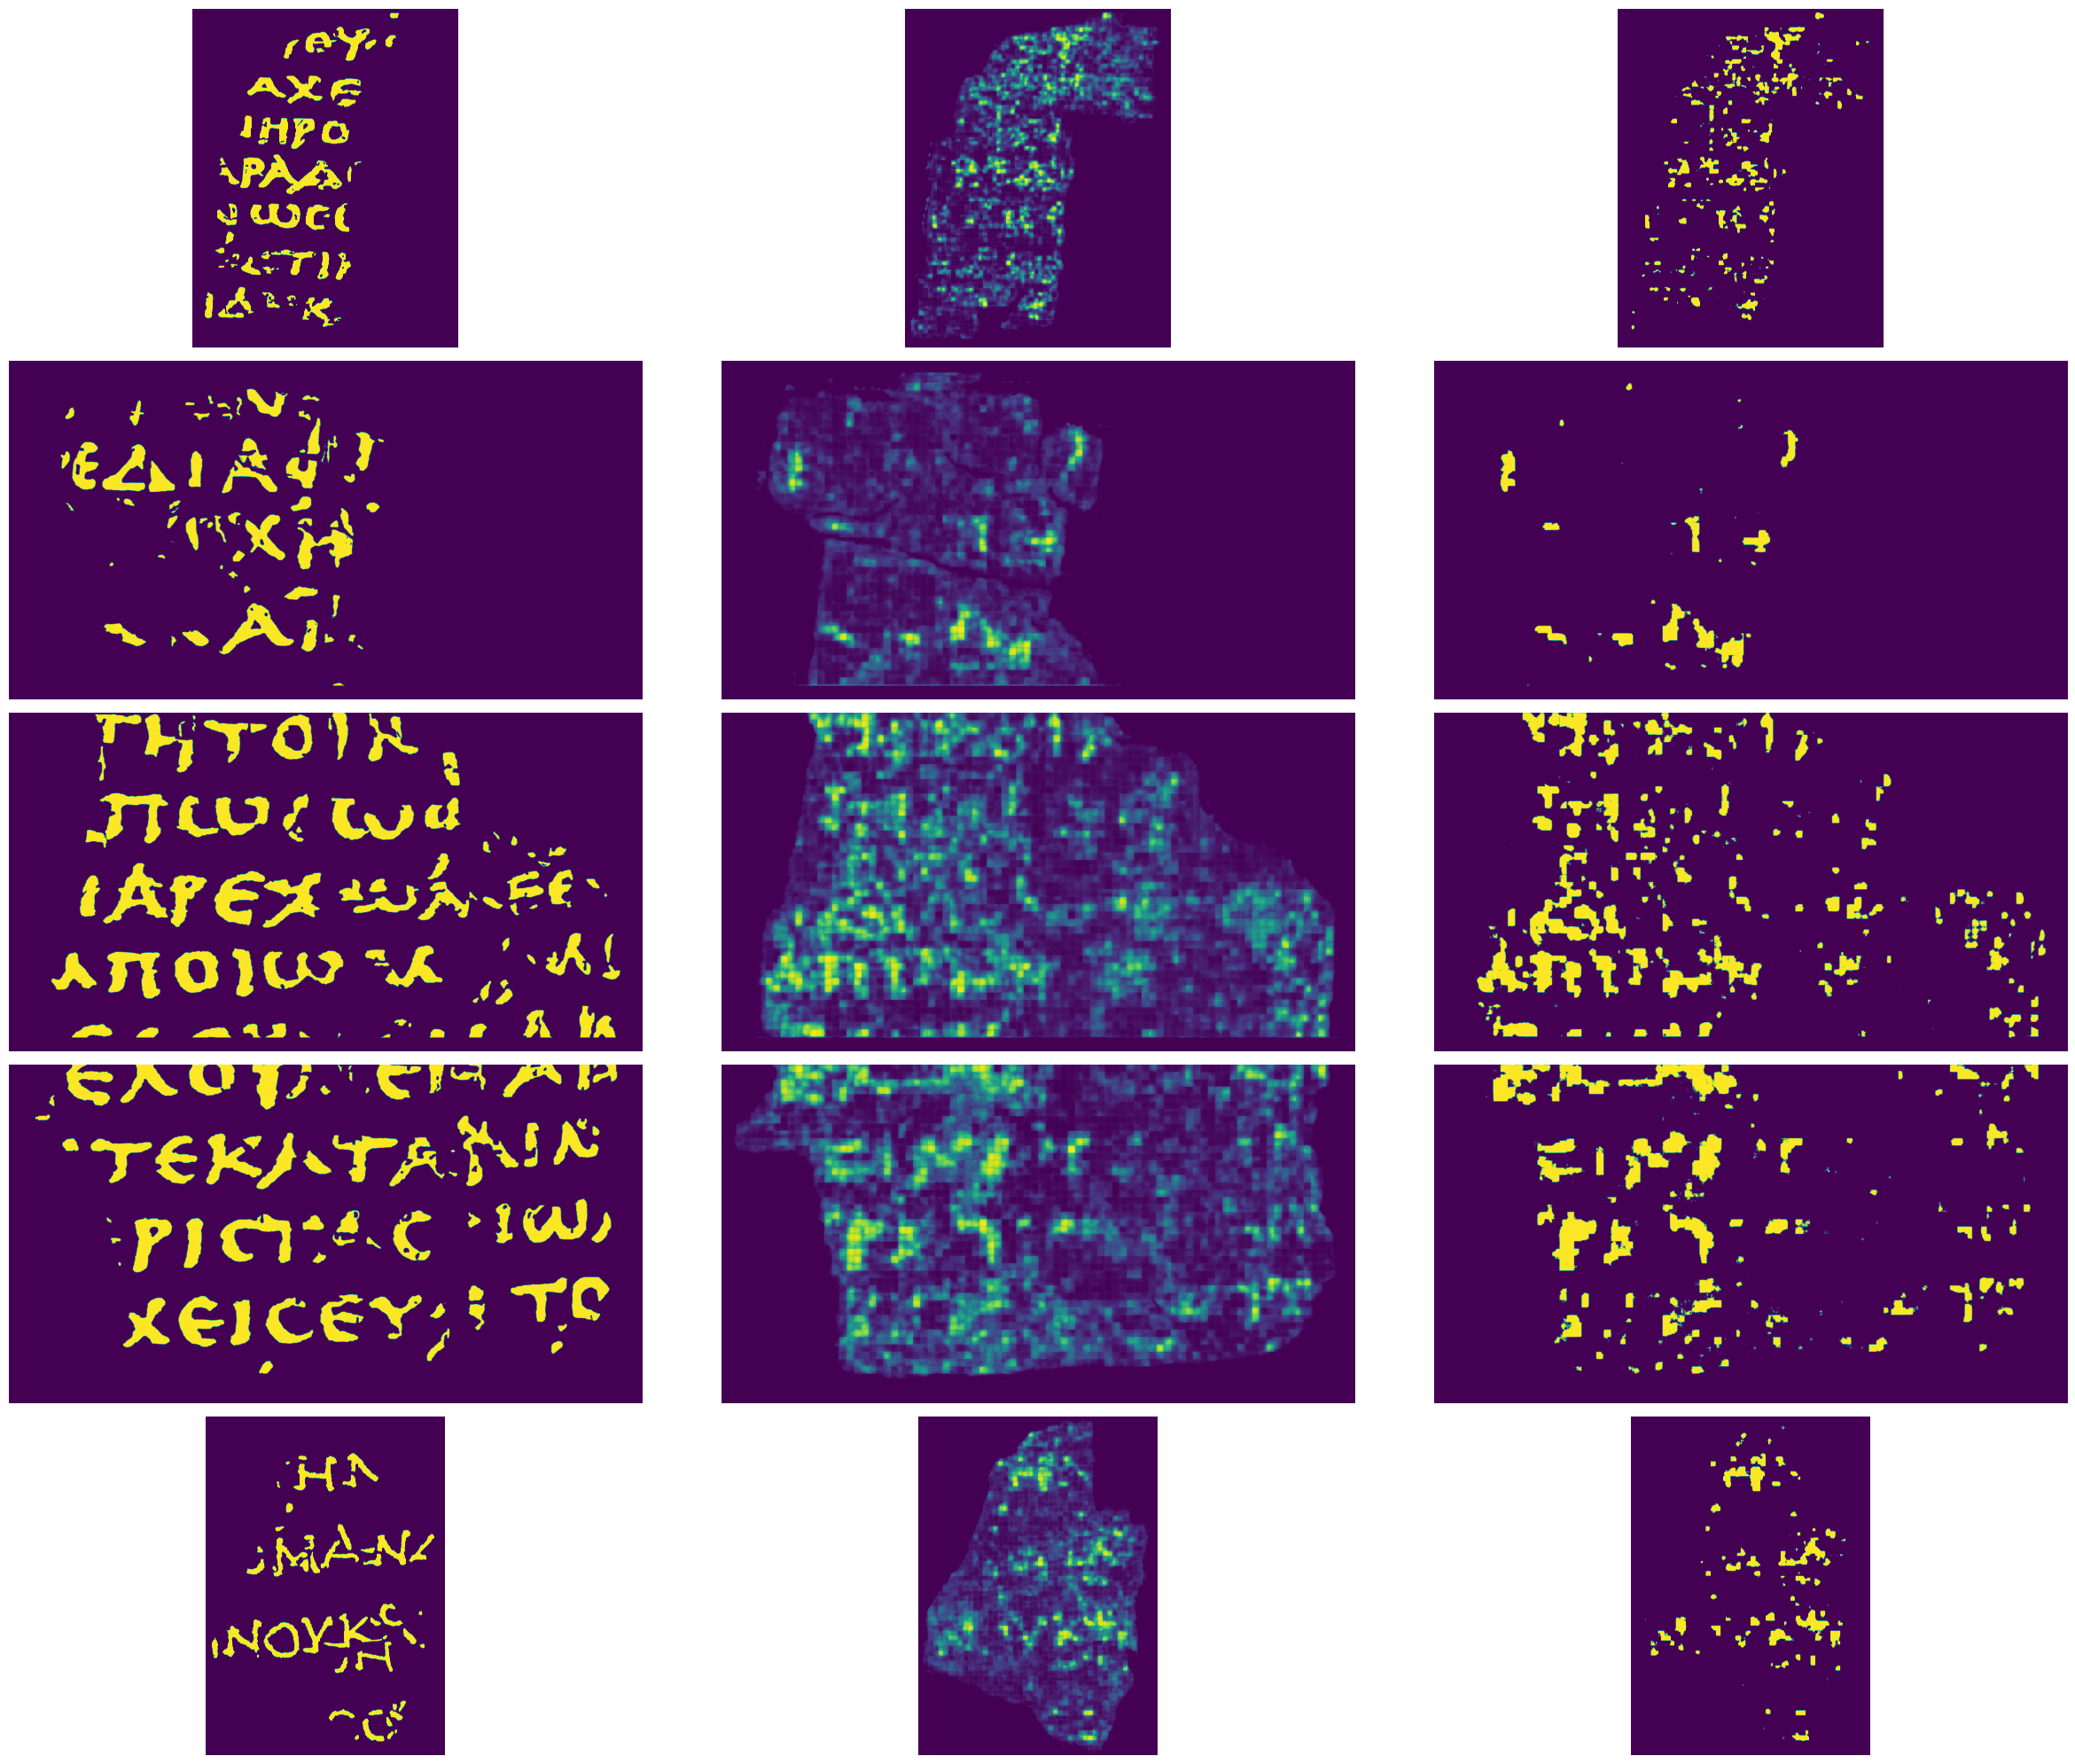

: 

In [14]:
plot_inference(valid_label_gt_list, label_pred_list, CFG)